In [1]:
import numpy as np
from boomdiff import AD, optimize

### Test `from_array` and `to_array`

In [2]:
x_array = np.array([1.5,8.4])

In [3]:
AD_x_array = AD.from_array(x_array,'x')

In [4]:
print(AD_x_array)

[1.5 ({'x_0': 1.0}) 8.4 ({'x_1': 1.0})]


In [5]:
print(AD.to_array(AD_x_array))

[1.5 8.4]


In [6]:
w_array = np.array([[3.0,2.4],
                    [1.5,3.3]])

In [7]:
AD_w_array = AD.from_array(w_array, 'w')

In [8]:
print(AD_w_array)

[[3.0 ({'w_0_0': 1.0}) 2.4 ({'w_0_1': 1.0})]
 [1.5 ({'w_1_0': 1.0}) 3.3 ({'w_1_1': 1.0})]]


In [9]:
print(AD.to_array(AD_w_array))

[[3.  2.4]
 [1.5 3.3]]


### Test pair-wise operations and matrix-like operations

In [10]:
X = np.random.normal(size=[10,2])

In [11]:
(X@AD_w_array).shape

(10, 2)

In [12]:
print(np.dot(X,AD_w_array).shape)

(10, 2)


In [13]:
a = AD(2.5, "a")

In [14]:
AD_w_array

array([[3.0 ({'w_0_0': 1.0}), 2.4 ({'w_0_1': 1.0})],
       [1.5 ({'w_1_0': 1.0}), 3.3 ({'w_1_1': 1.0})]], dtype=object)

In [15]:
a*AD_w_array

array([[7.5 ({'a': 3.0, 'w_0_0': 2.5}), 6.0 ({'a': 2.4, 'w_0_1': 2.5})],
       [3.75 ({'a': 1.5, 'w_1_0': 2.5}), 8.25 ({'a': 3.3, 'w_1_1': 2.5})]],
      dtype=object)

In [16]:
np.dot(a, AD_w_array)

array([[7.5 ({'a': 3.0, 'w_0_0': 2.5}), 6.0 ({'a': 2.4, 'w_0_1': 2.5})],
       [3.75 ({'a': 1.5, 'w_1_0': 2.5}), 8.25 ({'a': 3.3, 'w_1_1': 2.5})]],
      dtype=object)

In [17]:
a + AD_w_array

array([[5.5 ({'a': 1.0, 'w_0_0': 1.0}), 4.9 ({'a': 1.0, 'w_0_1': 1.0})],
       [4.0 ({'a': 1.0, 'w_1_0': 1.0}), 5.8 ({'a': 1.0, 'w_1_1': 1.0})]],
      dtype=object)

In [18]:
a - AD_w_array

array([[-0.5 ({'a': 1.0, 'w_0_0': -1.0}),
        0.10000000000000009 ({'a': 1.0, 'w_0_1': -1.0})],
       [1.0 ({'a': 1.0, 'w_1_0': -1.0}),
        -0.7999999999999998 ({'a': 1.0, 'w_1_1': -1.0})]], dtype=object)

In [19]:
a / AD_w_array

array([[0.8333333333333334 ({'a': 0.3333333333333333, 'w_0_0': -0.2777777777777778}),
        1.0416666666666667 ({'a': 0.4166666666666667, 'w_0_1': -0.4340277777777778})],
       [1.6666666666666667 ({'a': 0.6666666666666666, 'w_1_0': -1.1111111111111112}),
        0.7575757575757576 ({'a': 0.30303030303030304, 'w_1_1': -0.22956841138659323})]],
      dtype=object)

In [20]:
a ** AD_w_array

array([[15.625 ({'a': 18.75, 'w_0_0': 14.317042685533673}),
        9.016874411920083 ({'a': 8.65619943544328, 'w_0_1': 8.262078454115596})],
       [3.952847075210474 ({'a': 2.3717082451262845, 'w_1_0': 3.6219571395312187}),
        20.568471942722457 ({'a': 27.15038296439364, 'w_1_1': 18.846700209930184})]],
      dtype=object)

In [21]:
a + [AD(1), AD(2)]

array([3.5 ({'a': 1.0, 'x1': 1}), 4.5 ({'a': 1.0, 'x1': 1})], dtype=object)

### Test element-wise behavior of Static methods

In [22]:
AD.sin(AD_w_array)

array([[0.1411200080598672 ({'w_0_0': -0.9899924966004454}),
        0.675463180551151 ({'w_0_1': -0.7373937155412454})],
       [0.9974949866040544 ({'w_1_0': 0.0707372016677029}),
        -0.1577456941432482 ({'w_1_1': -0.9874797699088649})]],
      dtype=object)

In [23]:
AD.cos(AD_w_array)

array([[-0.9899924966004454 ({'w_0_0': -0.1411200080598672}),
        -0.7373937155412454 ({'w_0_1': -0.675463180551151})],
       [0.0707372016677029 ({'w_1_0': -0.9974949866040544}),
        -0.9874797699088649 ({'w_1_1': 0.1577456941432482})]],
      dtype=object)

In [24]:
AD.tan(AD_w_array)

array([[-0.1425465430742778 ({'w_0_0': 1.020319516942427}),
        -0.9160142896734106 ({'w_0_1': 1.839082178885883})],
       [14.10141994717172 ({'w_1_0': 199.8500445264925}),
        0.15974574766003222 ({'w_1_1': 1.0255187038954627})]],
      dtype=object)

In [25]:
w_array2 = np.array([[0.6,0.4],
                    [0.12,0.32]])
AD_w_array2 = AD.from_array(w_array2, prefix='w2')

In [26]:
AD.arcsin(AD_w_array2)

array([[0.6435011087932844 ({'w2_0_0': 1.25}),
        0.41151684606748806 ({'w2_0_1': 1.0910894511799618})],
       [0.12028988239478806 ({'w2_1_0': 1.0072787050317253}),
        0.3257294872946302 ({'w2_1_1': 1.0555008273018727})]],
      dtype=object)

In [27]:
AD.arccos(AD_w_array2)

array([[0.9272952180016123 ({'w2_0_0': -1.25}),
        1.1592794807274085 ({'w2_0_1': -1.0910894511799618})],
       [1.4505064444001086 ({'w2_1_0': -1.0072787050317253}),
        1.2450668395002664 ({'w2_1_1': -1.0555008273018727})]],
      dtype=object)

In [28]:
AD.tan(AD_w_array2)

array([[0.6841368083416923 ({'w2_0_0': 1.4680431725279575}),
        0.4227932187381618 ({'w2_0_1': 1.178754105810975})],
       [0.12057933721130532 ({'w2_1_0': 1.0145393765623176}),
        0.33138940522423466 ({'w2_1_1': 1.1098189378948722})]],
      dtype=object)

In [29]:
AD.sqrt(AD_w_array2)

array([[0.7745966692414834 ({'w2_0_0': 0.6454972243679028}),
        0.6324555320336759 ({'w2_0_1': 0.7905694150420948})],
       [0.34641016151377546 ({'w2_1_0': 1.4433756729740643}),
        0.565685424949238 ({'w2_1_1': 0.8838834764831844})]], dtype=object)

In [30]:
AD.log(AD_w_array2)

array([[-0.5108256237659907 ({'w2_0_0': 1.6666666666666667}),
        -0.916290731874155 ({'w2_0_1': 2.5})],
       [-2.120263536200091 ({'w2_1_0': 8.333333333333334}),
        -1.1394342831883648 ({'w2_1_1': 3.125})]], dtype=object)

In [31]:
AD.sinh(AD_w_array2)

array([[0.6366535821482412 ({'w2_0_0': 1.1854652182422676}),
        0.4107523258028155 ({'w2_0_1': 1.0810723718384547})],
       [0.12028820743110907 ({'w2_1_0': 1.0072086441482666}),
        0.32548936363113307 ({'w2_1_1': 1.051638400704824})]],
      dtype=object)

In [32]:
AD.cosh(AD_w_array2)

array([[1.1854652182422676 ({'w2_0_0': -0.6366535821482412}),
        1.0810723718384547 ({'w2_0_1': -0.4107523258028155})],
       [1.0072086441482666 ({'w2_1_0': -0.12028820743110907}),
        1.051638400704824 ({'w2_1_1': -0.32548936363113307})]],
      dtype=object)

In [33]:
AD.tanh(AD_w_array2)

array([[0.5370495669980353 ({'w2_0_0': 0.7115777625872229}),
        0.3799489622552249 ({'w2_0_1': 0.8556387860811778})],
       [0.11942729853438588 ({'w2_1_0': 0.9857371203647786}),
        0.30950692121263845 ({'w2_1_1': 0.9042054657214734})]],
      dtype=object)

In [34]:
AD.exp(AD_w_array2)

array([[1.8221188003905089 ({'w2_0_0': 1.8221188003905089}),
        1.4918246976412703 ({'w2_0_1': 1.4918246976412703})],
       [1.1274968515793757 ({'w2_1_0': 1.1274968515793757}),
        1.377127764335957 ({'w2_1_1': 1.377127764335957})]], dtype=object)

In [35]:
AD.logistic(AD_w_array2)

array([[0.6456563062257954 ({'w2_0_0': 0.2287842404566573}),
        0.598687660112452 ({'w2_0_1': 0.24026074574152917})],
       [0.5299640517645717 ({'w2_1_0': 0.24910215560185006}),
        0.5793242521487495 ({'w2_1_1': 0.2437076630210416})]],
      dtype=object)

### Some numpy-like operations

In [36]:
AD.sum(AD_w_array)

10.2 ({'w_0_0': 1.0, 'w_0_1': 1.0, 'w_1_0': 1.0, 'w_1_1': 1.0})

In [37]:
AD.mean(AD_w_array)

2.55 ({'w_0_0': 0.25, 'w_0_1': 0.25, 'w_1_0': 0.25, 'w_1_1': 0.25})

In [38]:
AD.dot(AD_w_array, AD_w_array2)

array([[2.0879999999999996 ({'w_0_0': 0.6, 'w2_0_0': 3.0, 'w_0_1': 0.12, 'w2_1_0': 2.4}),
        1.9680000000000002 ({'w_0_0': 0.4, 'w2_0_1': 3.0, 'w_0_1': 0.32, 'w2_1_1': 2.4})],
       [1.2959999999999998 ({'w_1_0': 0.6, 'w2_0_0': 1.5, 'w_1_1': 0.12, 'w2_1_0': 3.3}),
        1.6560000000000001 ({'w_1_0': 0.4, 'w2_0_1': 1.5, 'w_1_1': 0.32, 'w2_1_1': 3.3})]],
      dtype=object)

### A vector-flavor optimzier test

In [39]:
# Initialize a variable array
w = AD.from_array(np.random.normal(0,5,size=[2,2]), 'w')

In [40]:
print(w)

[[-12.765345263018125 ({'w_0_0': 1.0})
  -0.2986853229755326 ({'w_0_1': 1.0})]
 [0.6646994057727572 ({'w_1_0': 1.0})
  -0.4693559174860771 ({'w_1_1': 1.0})]]


In [41]:
loss = lambda: AD.sum(w**2)

In [42]:
opt_adam = optimize.Adam(learning_rate=0.1)
opt_adam.minimize(loss, w.reshape(-1), steps=100, record=True)

In [43]:
print("Optimization Results:")
print("======================")
print(AD.to_array(w))

Optimization Results:
[[-1.90087557e+00 -4.93873151e-05]
 [-2.55929655e-03  1.09524324e-03]]


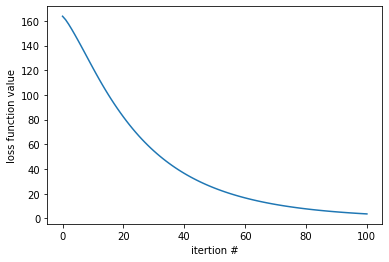

In [44]:
opt_adam.plot_loss_func()